<a href="https://colab.research.google.com/github/LucasAp-DEV/Trabalhocolab/blob/main/Trabalho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

**Colocando os arquivos nas variaveis de teste**

In [79]:
train_data = pd.read_csv('train-1.csv')
test_data = pd.read_csv('test.csv')
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [80]:
test_data.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


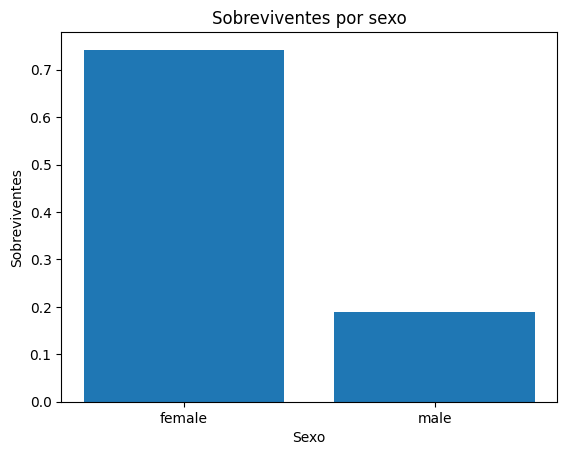

In [84]:
#Grafico em relacão de sobreviventes por sexo.
sobrevivente_sexo = train_data.groupby('Sex')['Survived'].mean()
plt.bar(sobrevivente_sexo.index, sobrevivente_sexo)
plt.xlabel('Sexo')
plt.ylabel('Sobreviventes')
plt.title('Sobreviventes por sexo')
plt.show()

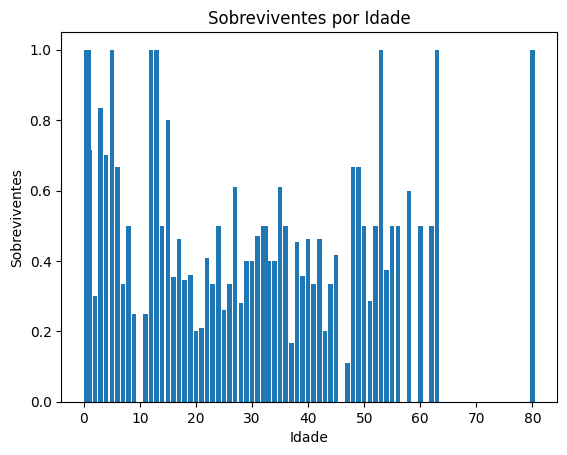

In [45]:
#Grafico em relacão a sobreviventes por idade.
sobrevivente_idade = train_data.groupby('Age')['Survived'].mean()
plt.bar(sobrevivente_idade.index, sobrevivente_idade)
plt.xlabel('Idade')
plt.ylabel('Sobreviventes')
plt.title('Sobreviventes por Idade')
plt.show()

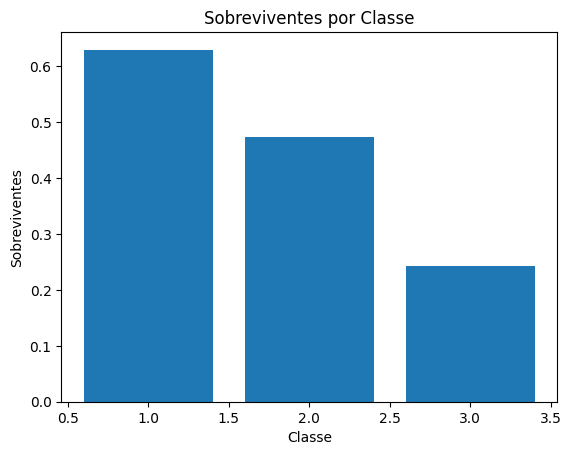

In [85]:
#Grafico de sobreviventes em relacão a classe.
sobrevivente_Pclass = train_data.groupby('Pclass')['Survived'].mean()
plt.bar(sobrevivente_Pclass.index, sobrevivente_Pclass)
plt.xlabel('Classe')
plt.ylabel('Sobreviventes')
plt.title('Sobreviventes por Classe')
plt.show()

In [56]:
#Taxa de sobrevivencia por Classe Economica
survival_by_class = train_data.groupby('Pclass')['Survived'].mean()
survival_by_class

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

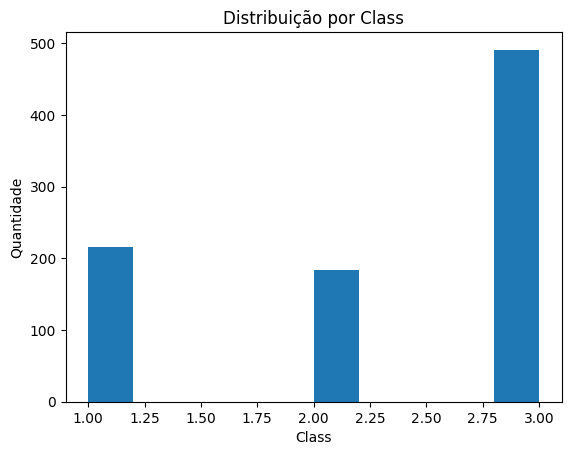

In [66]:
#Quantidade de pessoas por Classe
plt.hist(train_data['Pclass'])
plt.xlabel('Class')
plt.ylabel('Quantidade')
plt.title('Distribuição por Class')
plt.show()

In [64]:
#Taxa de sobrevivência por sexo e classe socioeconômica
survival_by_sex_class = train_data.groupby(['Sex', 'Pclass'])['Survived'].mean()
survival_by_sex_class

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64


In [75]:
#Média de idades para sobreviventes e não sobreviventes
media_survived = train_data[train_data['Survived'] == 1]['Age'].mean()
media_not_survived = train_data[train_data['Survived'] == 0]['Age'].mean()
print('Sobreviventes:', media_survived)
print('Não sobreviventes:', media_not_survived)

Sobreviventes: 28.343689655172415
Não sobreviventes: 30.62617924528302


In [94]:
#Variância das tarifas por classe.
Tarifa_1 = train_data[train_data['Pclass'] == 1]['Fare'].var()
Tarifa_2 = train_data[train_data['Pclass'] == 2]['Fare'].var()
Tarifa_3 = train_data[train_data['Pclass'] == 3]['Fare'].var()
print('Tarifas pagas pela 1° classe:', Tarifa_1)
print('Tarifas pagas pela 2° classe:', Tarifa_2)
print('Tarifas pagas pela 3° classe:', Tarifa_3)

Tarifas pagas pela 1° classe: 6143.4828162400745
Tarifas pagas pela 2° classe: 180.0265893815179
Tarifas pagas pela 3° classe: 138.72462200862753


In [99]:
#Porcentagem de sobreviventes por classe socioeconômica
porcentagem_sobreviventes_class = train_data.groupby('Pclass')['Survived'].mean() * 100
porcentagem_sobreviventes_class

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

In [102]:
#Divisão dos dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(train_data.drop('Survived', axis=1), train_data['Survived'], test_size=0.2, random_state=42)

In [103]:
#Probabilidade de sobrevivência por sexo
probability_survival_by_sex = train_data.groupby('Sex')['Survived'].mean()
print(probability_survival_by_sex)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
